In [6]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from PIL import Image
import numpy as np
import cv2
from glob import glob

from cityscapes.dataloader import array_to_divided_array
from cityscapes.divided_dataset import CityScapesDividedPTHCAMDataset, Divide
import cityscapesscripts.helpers.labels as labels


In [23]:
patch_size = 256
_full_width = 2048
_full_height = 1024
crop_size=224
cam_out_dir = "/workspaces/irn/result/cam"

columns_per_image = _full_width // patch_size
rows_per_image = _full_height // patch_size
patches_per_image = rows_per_image * columns_per_image

In [24]:

dataset = CityScapesDividedPTHCAMDataset(
    divide=Divide.Val,
    patch_size=patch_size,
    cam_out_dir=cam_out_dir,
    transform=None
)

In [33]:
def show(cam_idx, trainId):
    cams, img, _ = dataset[cam_idx]
    cams = cams[trainId]
    heatmap = cv2.applyColorMap((255*cams).astype(np.uint8), cv2.COLORMAP_JET)
    heatmap[cams < 0.1] = 0
    resized = cv2.resize(heatmap, (img.shape[0], img.shape[1]))
    added = np.multiply(resized, 0.5) + img
    added[added > 255] = 255
    print(labels.trainId2label[trainId].name)
    return Image.fromarray(np.uint8(added))

road


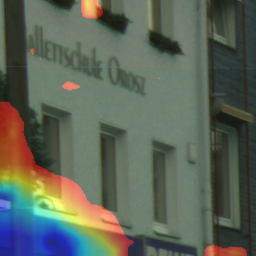

In [34]:
show(0, 0)

sidewalk


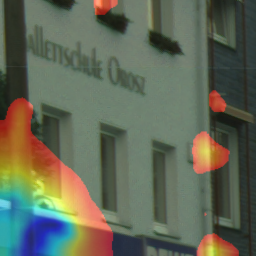

In [35]:
show(0, 1)

building


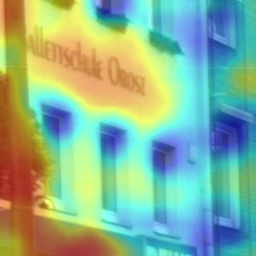

In [36]:
show (0, 2)